# Plots: errors examples

In [1]:
import sys
sys.path.append("..\\source\\")
import utils as utils
import glob
import datetime as dt

# Data and numbers
import pandas as pd
import numpy as np
import datetime as dt
from sklearn.preprocessing import MinMaxScaler

# Visualization
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import ticker
import matplotlib.dates as mdates
mpl.style.use('ggplot')
import seaborn as sns
sns.set_style("darkgrid")
%matplotlib inline

# Palettes
from matplotlib.colors import ListedColormap
from palettable.colorbrewer.qualitative import Set2_8

In [2]:
# Pallete
cmap_orig = Set2_8.mpl_colors # callable
cmap = [cmap_orig[7],cmap_orig[6],cmap_orig[4],cmap_orig[3],cmap_orig[1],cmap_orig[0]]

In [3]:
path_data = "..\\data\\processed\\summary\\"
path_meta = "..\\data\\original\\metadata\\"
path_res = "..\\results\\"
path_fig = "..\\figures\\"

In [4]:
ref = {0:"normal", 1:"A", 2:"B", 3:"C", 4:"D", 5:"E"}
color_ref = {0:cmap_orig[7], 1:cmap_orig[6], 2:cmap_orig[4], 3:cmap_orig[3], 4:cmap_orig[1], 5:cmap_orig[0]}

# Example plots

In [5]:
meter = "electricity"

In [26]:
"""site = 5

# Load winner submission
winner = pd.read_pickle("..\\temp\\data_out\\processed\\merged\\by_sub\\sub13865820_merged.pickle.gz")
# Load metadata
meta = pd.read_csv("..\\data\\original\\metadata\\building_metadata.csv")
# List of buildings in site 10 (selected to use as example)
bdgs = list(meta.loc[meta.site_id == site, "building_id"])
# Filter hotwater (3) and buildings from site 10
winner = winner[(winner.meter == 0) & (winner.building_id.isin(bdgs) == True)]
# to timestamp
winner.timestamp = pd.to_datetime(winner.timestamp, format="%Y-%m-%d %H:%M:%S")
winner.to_csv(f"winner_solution_{meter}_site{site}.csv", index=False)"""

In [6]:
# Load RMSLE array data
df_site3 = pd.read_csv(f"..\\data\\processed\\arrays\\{meter}_RMSLE_site_3.csv")
df_site9 = pd.read_csv(f"..\\data\\processed\\arrays\\{meter}_RMSLE_site_9.csv")
# Load winner submission
winner_site3 = pd.read_csv(f"winner_solution_{meter}_site3.csv",parse_dates=["timestamp"])
winner_site9 = pd.read_csv(f"winner_solution_{meter}_site9.csv",parse_dates=["timestamp"])

## Error A

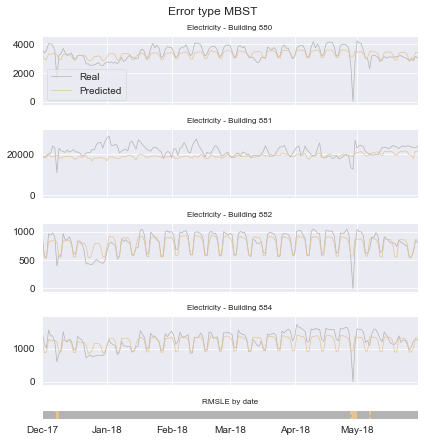

In [7]:
winner = winner_site9.copy()
df = df_site9.copy()

error_name = "MBST"
bdgs = [880,881,882,884]
color_normal = cmap_orig[7]
color = cmap_orig[6]
ratios = [3,3,3,3,0.4]
#Create figure canvas
fig, axes = plt.subplots(5, 1, sharex = True, sharey=False, figsize=(6,6), gridspec_kw = {"height_ratios": ratios})
axes = axes.flatten()

"""# EXAMPLE ERROR HEATMAP
# Get the data
y = np.linspace(0, len(error_df), len(error_df)+1)
x = pd.date_range(start='2017-01-01', end='2019-01-01')
data = error_df
# Plot
colors = [color_normal, color]
cmap_plot = ListedColormap(colors)
ax = axes[0]
qmesh = ax.pcolormesh(x, y, data, cmap=cmap_plot, rasterized=True, vmin=0, vmax=1)
# Axis
ax.locator_params(axis='y', nbins=len(list(data.index))+1)
ax.axis('tight') 
ax.set_yticklabels(list(data.index))
# Get labels
labels = [item for item in ax.get_yticklabels()]
# Remove all labels except selected building
bdgs_str = [str(bdg) for bdg in bdgs]
[x.set_text("") for x in labels if (x.get_text() not in bdgs_str)]
# Set labels
ax.set_yticklabels(labels, fontsize=8)
ax.set_xticklabels([])
ax.set_title(f"Error type {error_name}")
ax.set_xlabel('Timestamp')
ax.set_ylabel('Building ID')"""

# METER READING AND PREDICTION LINEPLOT
for i,bdg in enumerate(bdgs):
    # Filter data and set index
    temp = winner.loc[winner.building_id == bdg,["timestamp","meter_reading","submission"]]
    temp.set_index("timestamp",inplace=True)
    # Resample
    temp = temp.resample('24H').sum().reset_index()

    ax = axes[i] #axes[i+1]
    sns.lineplot(data=temp, x="timestamp",y="meter_reading", ax=ax, legend="auto", color=color_normal, linewidth = 0.7)
    sns.lineplot(data=temp, x="timestamp",y="submission", ax=ax, legend="auto", color=color, linewidth = 0.7)
    ax.set_xlim([dt.date(2017, 12, 1), dt.date(2018, 5, 30)])
    ax.set_ylabel("")
    ax.set_title(f"Electricity - Building {bdg}",fontsize=8)

    if i == 0:
        ax.legend(labels=['Real','Predicted'], loc="lower left")

# Get the data
y = np.linspace(0, len(bdgs), len(bdgs)+1)
x = pd.date_range(start='2017-01-01', end='2019-01-01')
temp1 = df[df.building_id.isin(bdgs)==True].set_index("building_id")
# Error heatmap Plot
ax = axes[-1]
cmap = ListedColormap([color_normal, color, color, color])
qmesh = ax.pcolormesh(x, y, temp1, cmap=cmap, rasterized=True)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%y'))
ax.set_xlim([dt.date(2017, 12, 1), dt.date(2018, 5, 30)])
ax.set_title(f"RMSLE by date",fontsize=8)
ax.set_yticklabels([])

# Figure parameters
plt.tight_layout()
fig.suptitle(f"Error type {error_name}", y = 1.015, x = 0.5, fontsize=12)
fig.savefig(path_fig + f"error{error_name}_example.pdf", dpi=150, bbox_inches="tight")
fig.savefig(path_fig + f"error{error_name}_example.png", dpi=150, bbox_inches="tight")

## Error B

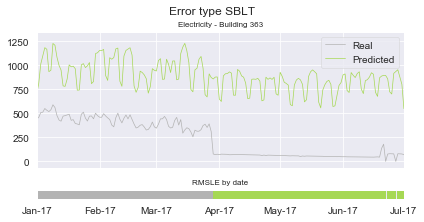

In [13]:
winner = winner_site3.copy()
df = df_site3.copy()

error_name = "SBLT"
bdg = 363
color_normal = cmap_orig[7]
color = cmap_orig[4]
ratios = [3,0.2]

#Create figure canvas
fig, axes = plt.subplots(2, 1, sharex = True, sharey=False, figsize=(6,3), gridspec_kw = {"height_ratios": ratios})
axes = axes.flatten()

# METER READING AND PREDICTION LINEPLOT
temp = winner.loc[winner.building_id == bdg,["timestamp","meter_reading","submission"]]
temp.set_index("timestamp",inplace=True)
# Resample
temp = temp.resample('24H').sum().reset_index()

ax = axes[0]
sns.lineplot(data=temp, x="timestamp",y="meter_reading", ax=ax, color=color_normal, linewidth = 0.7)
sns.lineplot(data=temp, x="timestamp",y="submission", ax=ax, color=color, linewidth = 0.7)
ax.set_xlim([dt.date(2017, 1, 1), dt.date(2017, 7, 1)])
ax.set_ylabel("")
ax.set_title(f"Electricity - Building {bdg}",fontsize=8)
ax.legend(labels=['Real','Predicted'], loc = "upper right")

# ERROR HEATMAP
# Get the data
y = np.linspace(0, 1, 2)
x = pd.date_range(start='2017-01-01', end='2019-01-01')
temp1 = df[df.building_id==bdg].set_index("building_id")
# Error heatmap Plot
ax = axes[-1]
cmap = ListedColormap([color_normal, color, color])
qmesh = ax.pcolormesh(x, y, temp1, cmap=cmap, rasterized=True)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%y'))
ax.set_xlim([dt.date(2017, 1, 1), dt.date(2017, 7, 1)])
ax.set_title(f"RMSLE by date",fontsize=8)
ax.set_yticklabels([])

# Figure parameters
plt.tight_layout()
fig.suptitle(f"Error type {error_name}", y = 1.015, x = 0.5, fontsize=12)
fig.savefig(path_fig + f"error{error_name}_example.pdf", dpi=150, bbox_inches="tight")
fig.savefig(path_fig + f"error{error_name}_example.png", dpi=150, bbox_inches="tight")

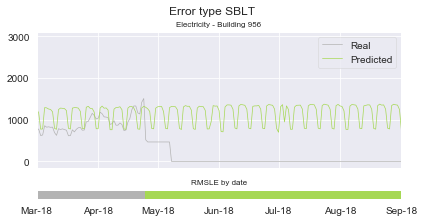

In [9]:
winner = winner_site9.copy()
df = df_site9.copy()

error_name = "SBLT"
bdg = 956
color_normal = cmap_orig[7]
color = cmap_orig[4]
ratios = [3,0.2]

#Create figure canvas
fig, axes = plt.subplots(2, 1, sharex = True, sharey=False, figsize=(6,3), gridspec_kw = {"height_ratios": ratios})
axes = axes.flatten()

# METER READING AND PREDICTION LINEPLOT
temp = winner.loc[winner.building_id == bdg,["timestamp","meter_reading","submission"]]
temp.set_index("timestamp",inplace=True)
# Resample
temp = temp.resample('24H').sum().reset_index()

ax = axes[0]
sns.lineplot(data=temp, x="timestamp",y="meter_reading", ax=ax, color=color_normal, linewidth = 0.7)
sns.lineplot(data=temp, x="timestamp",y="submission", ax=ax, color=color, linewidth = 0.7)
ax.set_xlim([dt.date(2018, 3, 1), dt.date(2018, 9, 1)])
ax.set_ylabel("")
ax.set_title(f"Electricity - Building {bdg}",fontsize=8)
ax.legend(labels=['Real','Predicted'], loc = "upper right")

# ERROR HEATMAP
# Get the data
y = np.linspace(0, 1, 2)
x = pd.date_range(start='2017-01-01', end='2019-01-01')
temp1 = df[df.building_id==bdg].set_index("building_id")
# Error heatmap Plot
ax = axes[-1]
cmap = ListedColormap([color_normal, color, color])
qmesh = ax.pcolormesh(x, y, temp1, cmap=cmap, rasterized=True)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%y'))
ax.set_xlim([dt.date(2018, 3, 1), dt.date(2018, 9, 1)])
ax.set_title(f"RMSLE by date",fontsize=8)
ax.set_yticklabels([])

# Figure parameters
plt.tight_layout()
fig.suptitle(f"Error type {error_name}", y = 1.015, x = 0.5, fontsize=12)
fig.savefig(path_fig + f"error{error_name}_example1.pdf", dpi=150, bbox_inches="tight")
fig.savefig(path_fig + f"error{error_name}_example1.png", dpi=150, bbox_inches="tight")

## Error C

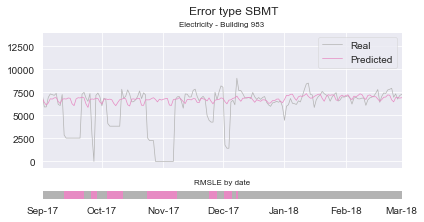

In [10]:
winner = winner_site9.copy()
df = df_site9.copy()

error_name = "SBMT"
bdg = 983
color_normal = cmap_orig[7]
color = cmap_orig[3]
ratios = [3,0.2]

#Create figure canvas
fig, axes = plt.subplots(2, 1, sharex = True, sharey=False, figsize=(6,3), gridspec_kw = {"height_ratios": ratios})
axes = axes.flatten()

# METER READING AND PREDICTION LINEPLOT
temp = winner.loc[(winner.building_id == bdg), ["timestamp","meter_reading","submission"]]
temp.set_index("timestamp",inplace=True)
# Resample
temp = temp.resample('24H').sum().reset_index()

ax = axes[0]
sns.lineplot(data=temp, x="timestamp",y="meter_reading", ax=ax, color=color_normal, linewidth = 0.7)
sns.lineplot(data=temp, x="timestamp",y="submission", ax=ax, color=color, linewidth = 0.7)
ax.set_xlim([dt.date(2017, 9, 1), dt.date(2018, 3, 1)])
ax.set_ylabel("")
ax.set_title(f"Electricity - Building {bdg}",fontsize=8)
ax.legend(labels=['Real','Predicted'], loc = "upper right")

# ERROR HEATMAP
# Get the data
y = np.linspace(0, 1, 2)
x = pd.date_range(start='2017-01-01', end='2019-01-01')
temp1 = df[df.building_id==bdg].set_index("building_id")
# Error heatmap Plot
ax = axes[-1]
cmap = ListedColormap([color_normal, color])
qmesh = ax.pcolormesh(x, y, temp1, cmap=cmap, rasterized=True)
ax.set_xlim([dt.date(2017, 9, 1), dt.date(2018, 3, 1)])
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%y'))
ax.set_title(f"RMSLE by date",fontsize=8)
ax.set_yticklabels([])

# Figure parameters
plt.tight_layout()
fig.suptitle(f"Error type {error_name}", y = 1.015, x = 0.55, fontsize=12)
fig.savefig(path_fig + f"error{error_name}_example.pdf", dpi=150, bbox_inches="tight")
fig.savefig(path_fig + f"error{error_name}_example.png", dpi=150, bbox_inches="tight")

## Error D

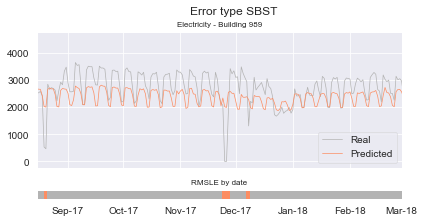

In [11]:
winner = winner_site9.copy()
df = df_site9.copy()

error_name = "SBST"
bdg = 989
color_normal = cmap_orig[7]
color = cmap_orig[1]
ratios = [3,0.2]

#Create figure canvas
fig, axes = plt.subplots(2, 1, sharex = True, sharey=False, figsize=(6,3), gridspec_kw = {"height_ratios": ratios})
axes = axes.flatten()

# METER READING AND PREDICTION LINEPLOT
temp = winner.loc[winner.building_id == bdg,["timestamp","meter_reading","submission"]]
temp.set_index("timestamp",inplace=True)
# Resample
temp = temp.resample('24H').sum().reset_index()

ax = axes[0]
sns.lineplot(data=temp, x="timestamp",y="meter_reading", ax=ax, color=color_normal, linewidth = 0.7)
sns.lineplot(data=temp, x="timestamp",y="submission", ax=ax, color=color, linewidth = 0.7)
ax.set_xlim([dt.date(2017, 8, 15), dt.date(2018, 3, 1)])
ax.set_ylabel("")
ax.set_title(f"Electricity - Building {bdg}",fontsize=8)
ax.legend(labels=['Real','Predicted'], loc = "lower right")

# ERROR HEATMAP
# Get the data
y = np.linspace(0, 1, 2)
x = pd.date_range(start='2017-01-01', end='2019-01-01')
temp1 = df[df.building_id==bdg].set_index("building_id")
# Error heatmap Plot
ax = axes[-1]
cmap = ListedColormap([color_normal, color, color, color])
qmesh = ax.pcolormesh(x, y, temp1, cmap=cmap, rasterized=True)
ax.set_xlim([dt.date(2017, 8, 15), dt.date(2018, 3, 1)])
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%y'))
ax.set_title(f"RMSLE by date",fontsize=8)
ax.set_yticklabels([])

# Figure parameters
plt.tight_layout()
fig.suptitle(f"Error type {error_name}", y = 1.015, x = 0.55, fontsize=12)
fig.savefig(path_fig + f"error{error_name}_example.pdf", dpi=150, bbox_inches="tight")
fig.savefig(path_fig + f"error{error_name}_example.png", dpi=150, bbox_inches="tight")

## Error E

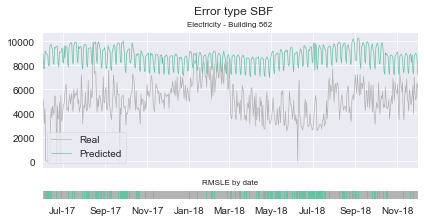

In [12]:
winner = winner_site3.copy()
df = df_site3.copy()

error_name = "SBF"
bdg = 562
color_normal = cmap_orig[7]
color = cmap_orig[0]
ratios = [3,0.2]

#Create figure canvas
fig, axes = plt.subplots(2, 1, sharex = True, sharey=False, figsize=(6,3), gridspec_kw = {"height_ratios": ratios})
axes = axes.flatten()

# METER READING AND PREDICTION LINEPLOT
temp = winner.loc[winner.building_id == bdg,["timestamp","meter_reading","submission"]]
temp.set_index("timestamp",inplace=True)
# Resample
temp = temp.resample('24H').sum().reset_index()

ax = axes[0]
sns.lineplot(data=temp, x="timestamp",y="meter_reading", ax=ax, color=color_normal, linewidth = 0.7)
sns.lineplot(data=temp, x="timestamp",y="submission", ax=ax, color=color, linewidth = 0.7)
ax.set_xlim([dt.date(2017, 6, 1), dt.date(2017, 12, 1)])
ax.set_ylabel("")
ax.set_title(f"Electricity - Building {bdg}",fontsize=8)
ax.legend(labels=['Real','Predicted'], loc = "lower left")

# ERROR HEATMAP
# Get the data
y = np.linspace(0, 1, 2)
x = pd.date_range(start='2017-01-01', end='2019-01-01')
temp1 = df[df.building_id==bdg].set_index("building_id")
# Error heatmap Plot
ax = axes[-1]
cmap = ListedColormap([color_normal, color, color, color])
qmesh = ax.pcolormesh(x, y, temp1, cmap=cmap, rasterized=True)
ax.set_xlim([dt.date(2017, 6, 1), dt.date(2018, 12, 1)])
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%y'))
ax.set_title(f"RMSLE by date",fontsize=8)
ax.set_yticklabels([])

# Figure parameters
plt.tight_layout()
fig.suptitle(f"Error type {error_name}", y = 1.015, x = 0.55, fontsize=12)
fig.savefig(path_fig + f"error{error_name}_example.pdf", dpi=150, bbox_inches="tight")
fig.savefig(path_fig + f"error{error_name}_example.png", dpi=150, bbox_inches="tight")